In [5]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None


from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

#Encoding schtuff
from sklearn import preprocessing
from sklearn import utils

# Feature selection lib
from sklearn.feature_selection import RFE

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt
import math

## Import Dataset

In [6]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [7]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

## Understanding the data

#### Correlation of Features

In [7]:
def plot_pearson_correlation_of_features(train):
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

In [8]:
def plot_correlation_features_against_target(train, target):
    for column in train:
        color = np.random.rand(3,)
        plt.scatter(train[column], train[target], color=color)
        plt.title(column + " against " + target)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

In [9]:
def scatter_plot_by_group(train, target):

    groups = train.groupby(target)

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
       
    for name, group in groups:
        plt.xlabel(group.columns[0])
        plt.ylabel(group.columns[1])
        ax.plot(group[group.columns[0]], group[group.columns[1]], marker='o', linestyle='', ms=5, label=name)
    ax.legend()

    plt.show()

In [65]:
def plot_normal_distribution(score, std):
    
    plt.title('Confidence interval - Normal Distribution')
    variance = std
    sigma = math.sqrt(variance)
    x = np.linspace(score - 3*sigma, score + 3*sigma, 100)
    plt.plot(x,mlab.normpdf(x, score, sigma))
    plt.show()

In [11]:
def tplot(score, std):
    
    keys = list(score.keys())
    print(keys)
    score = np.fromiter(iter(score.values()), dtype=float)
    error = np.fromiter(iter(std.values()), dtype=float)

    x = score
    y = np.exp(-x)

    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=0.2, yerr=error)
    plt.xticks(x, keys)
    plt.title('Confidence interval - T-Plot')
    plt.xlim([-1,1])
    plt.show()

#### Visualise correlation between features and Target
Scatter Plot by value

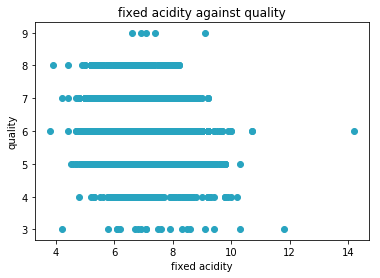

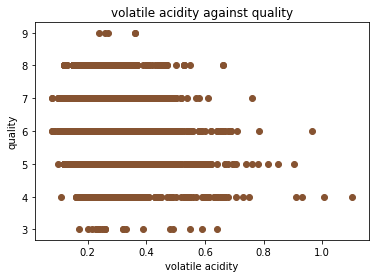

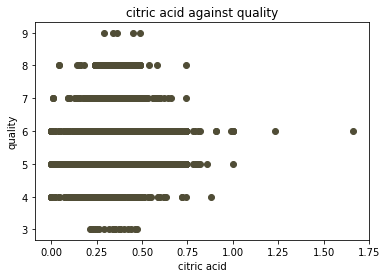

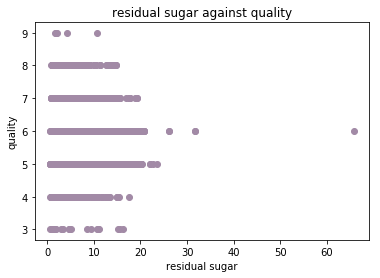

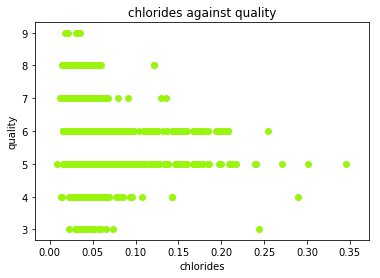

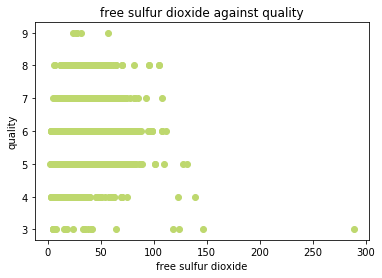

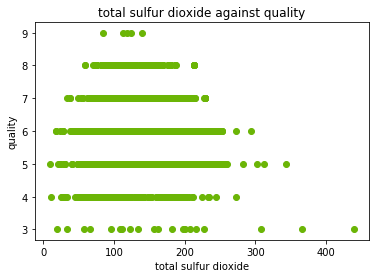

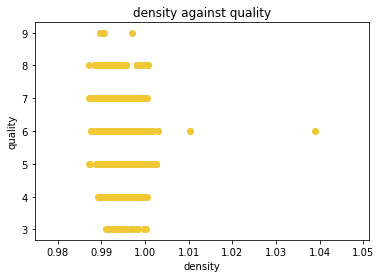

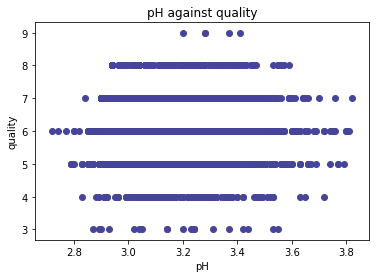

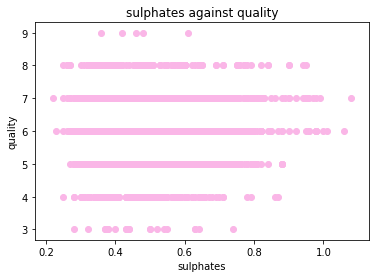

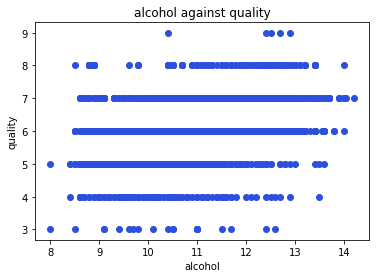

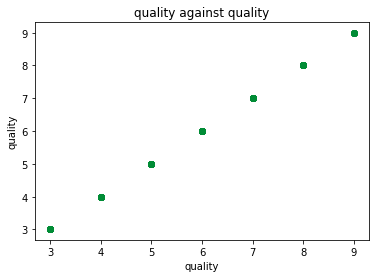

In [12]:
plot_correlation_features_against_target(data, "quality")

#### Visualise summerization of correlation between features
Pearson correlation of feature

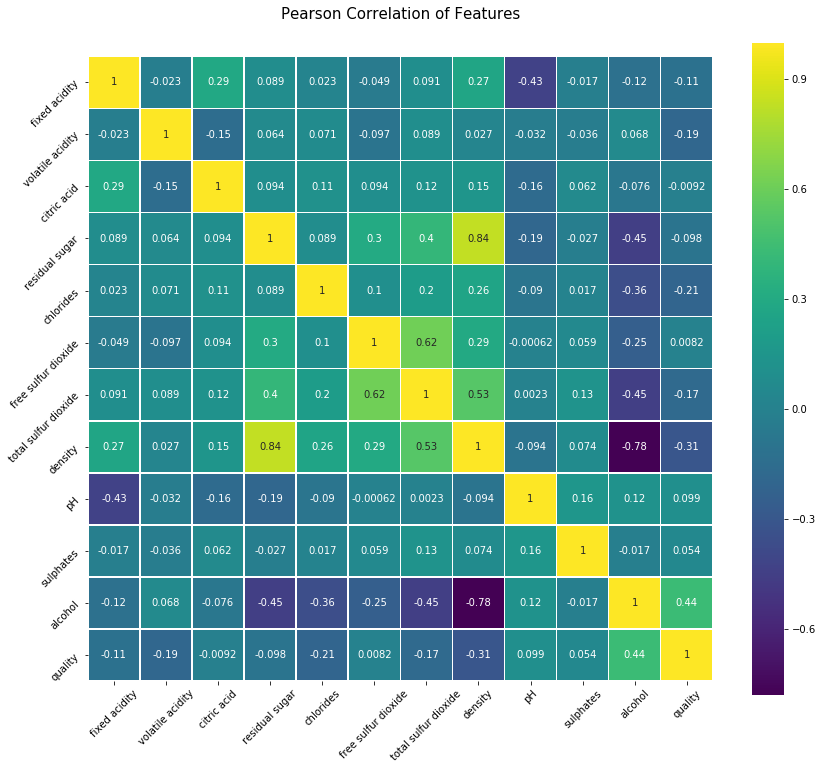

In [13]:
plot_pearson_correlation_of_features(data)

#### Understand the distributions of quality along feature
Scatter plot by group

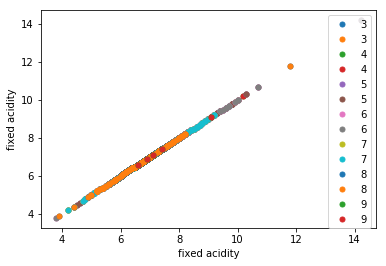

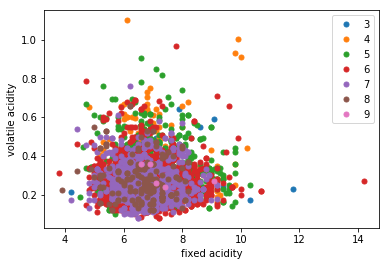

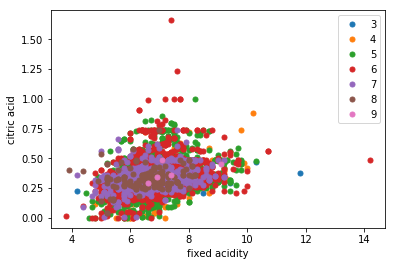

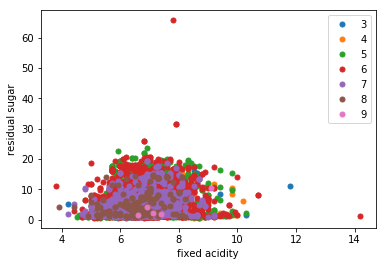

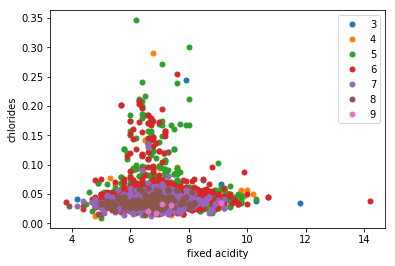

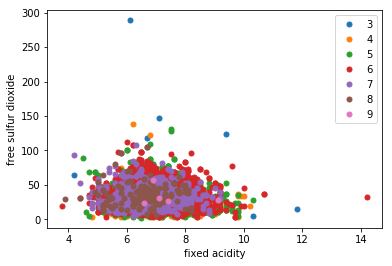

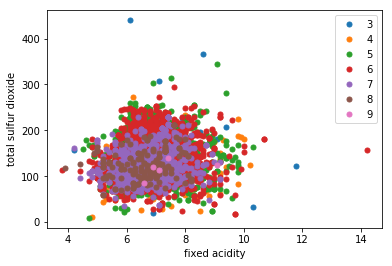

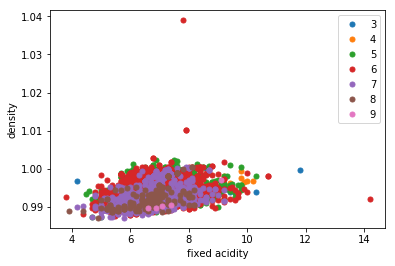

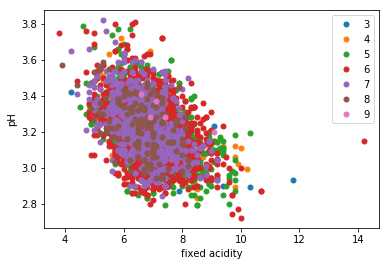

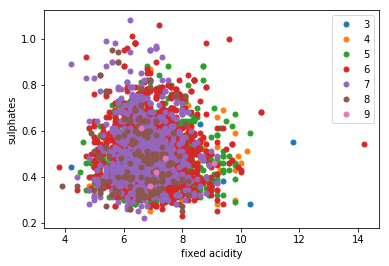

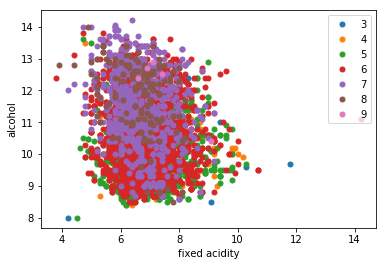

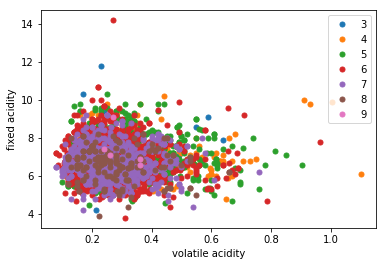

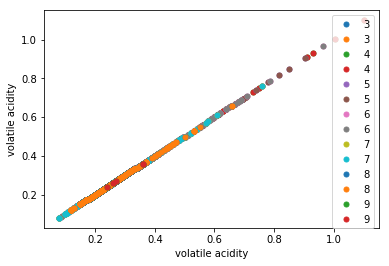

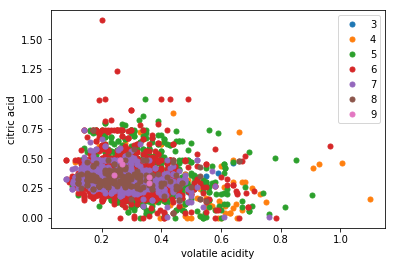

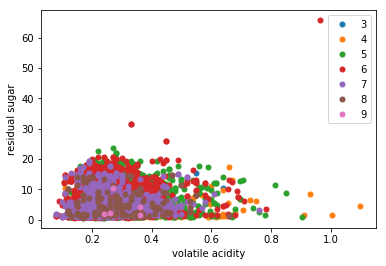

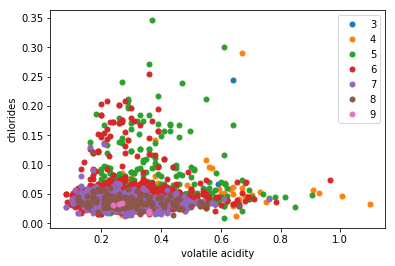

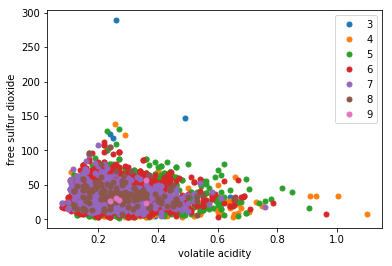

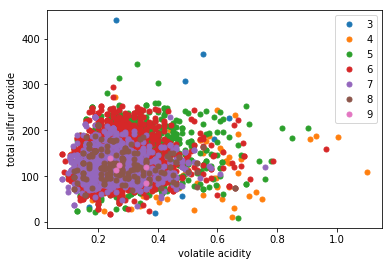

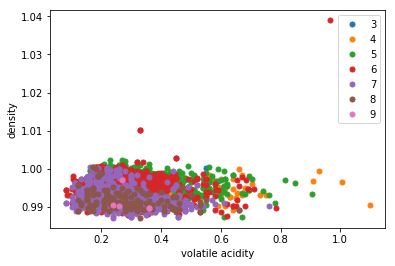

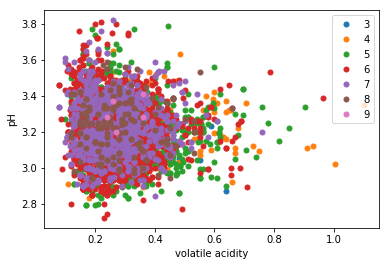

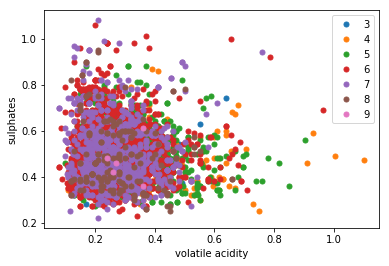

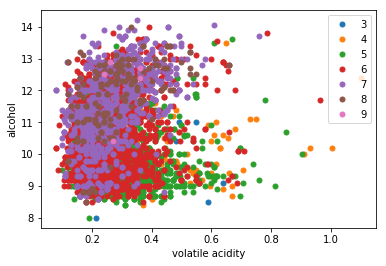

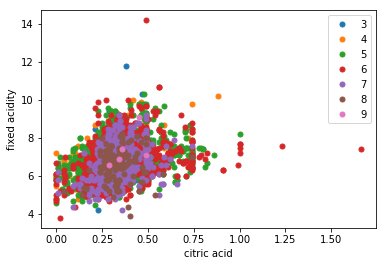

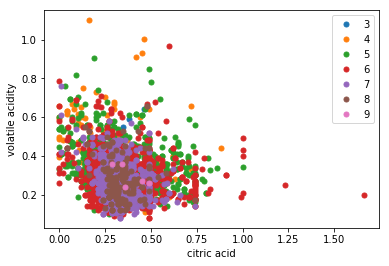

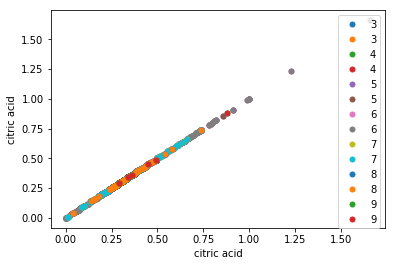

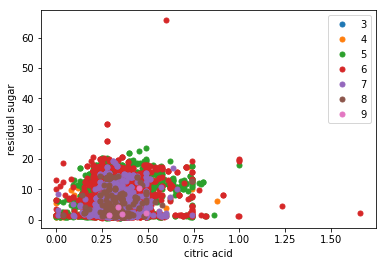

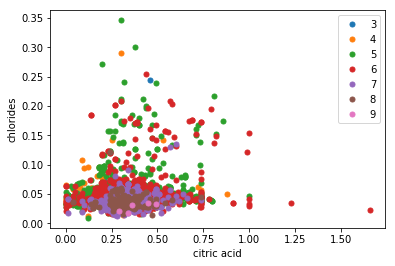

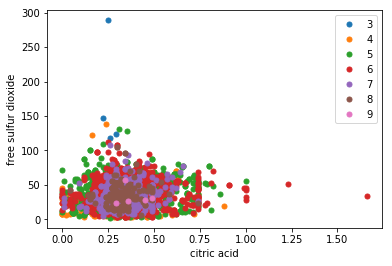

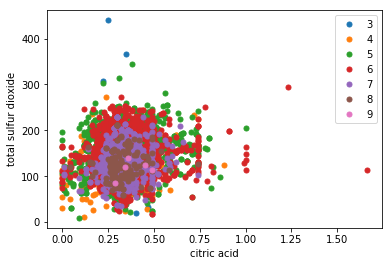

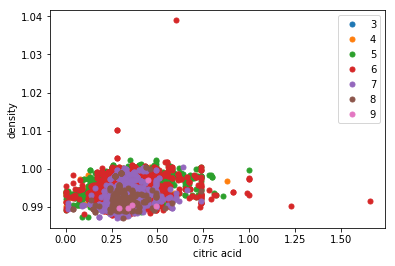

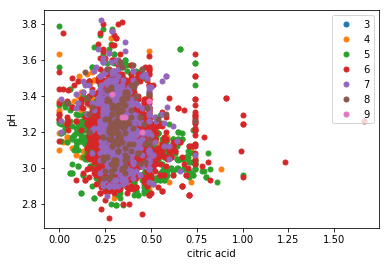

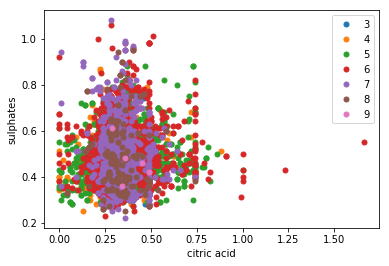

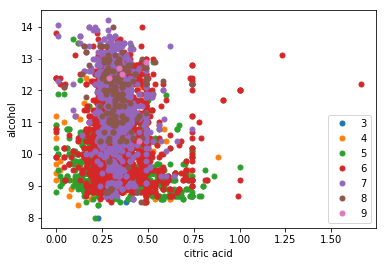

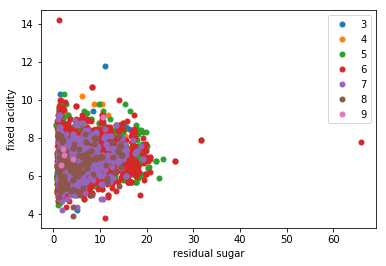

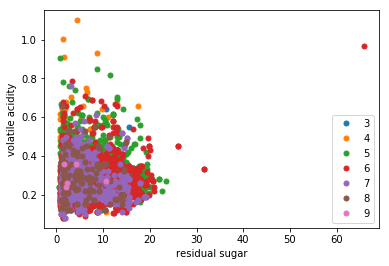

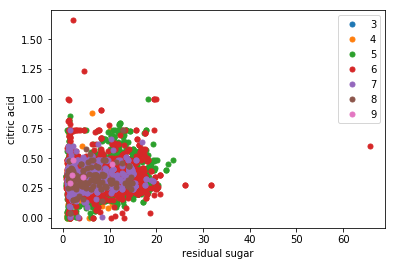

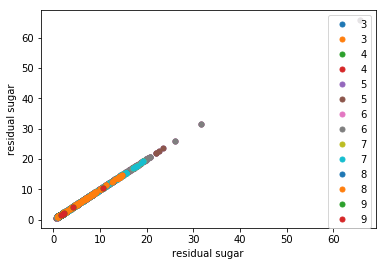

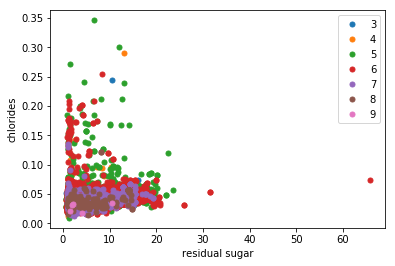

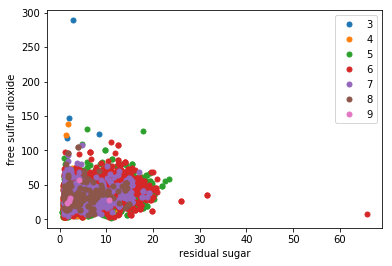

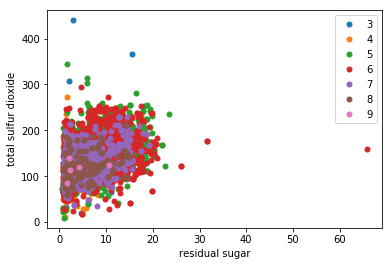

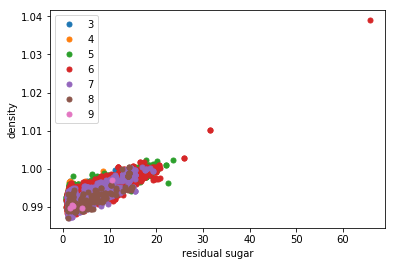

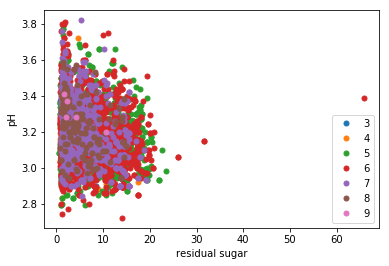

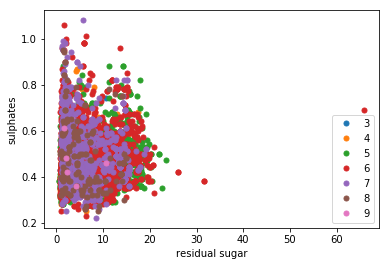

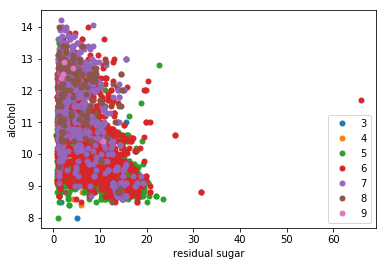

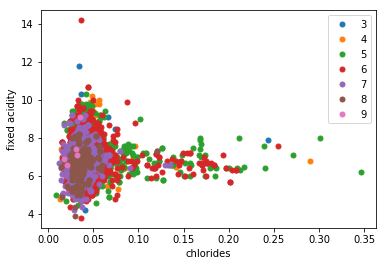

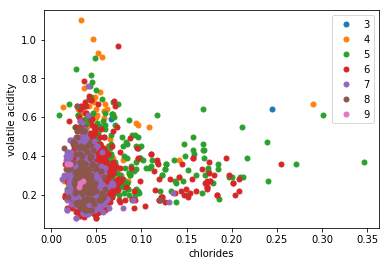

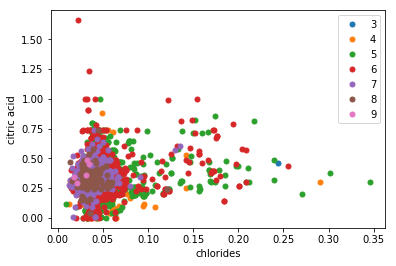

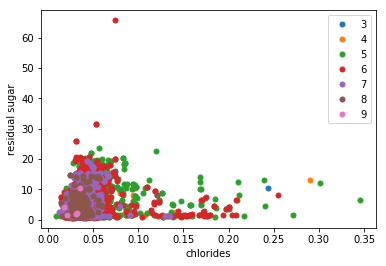

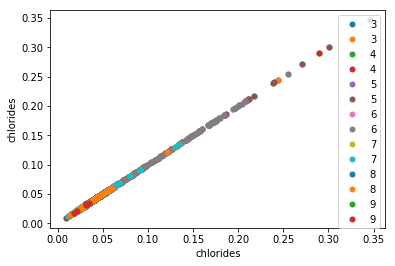

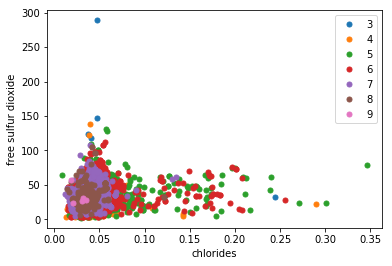

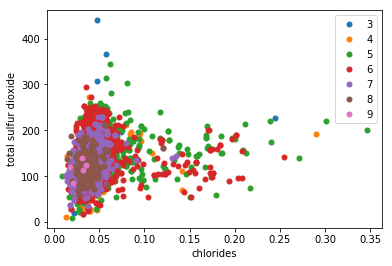

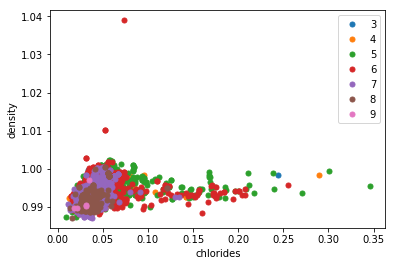

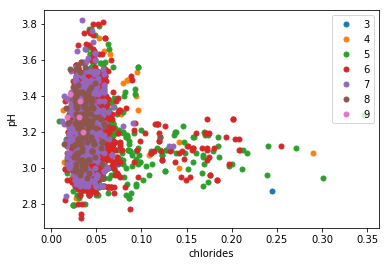

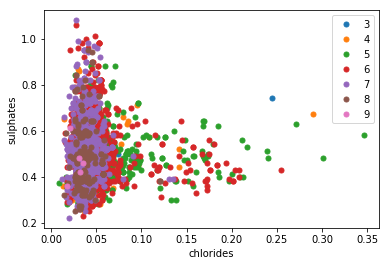

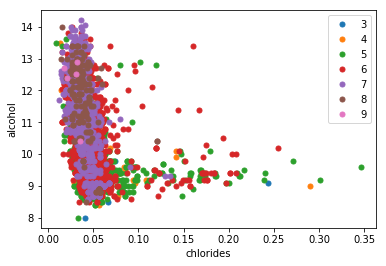

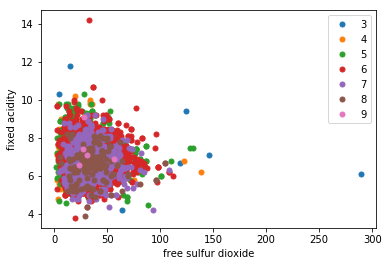

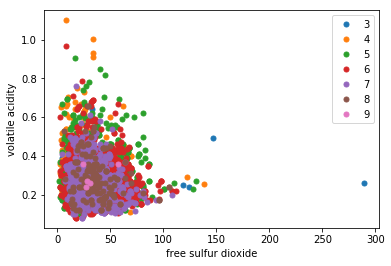

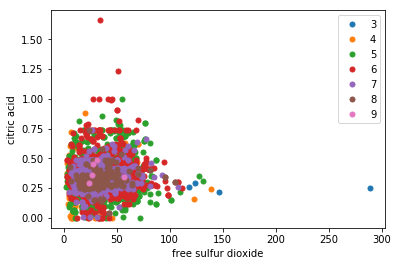

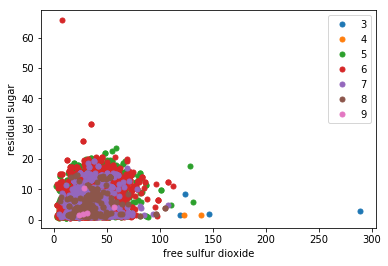

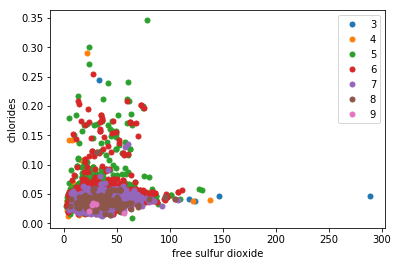

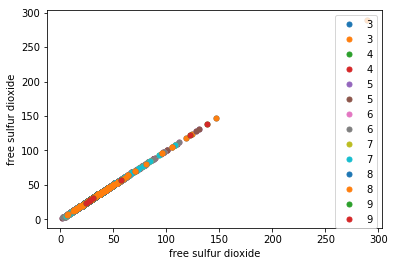

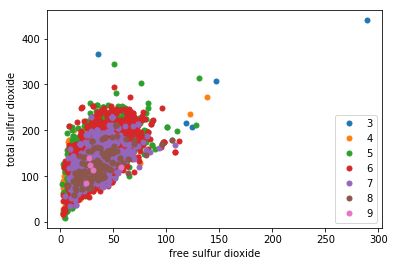

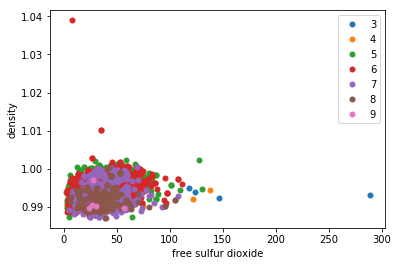

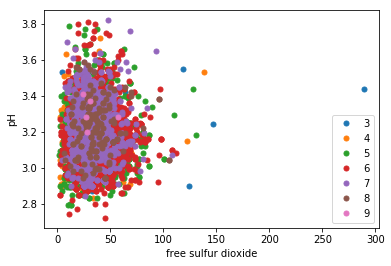

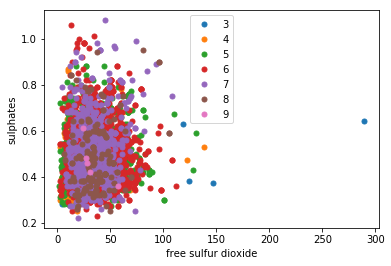

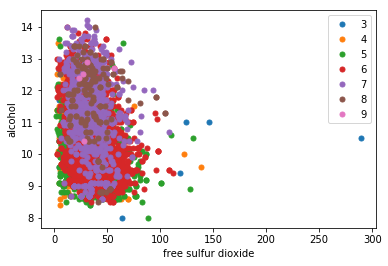

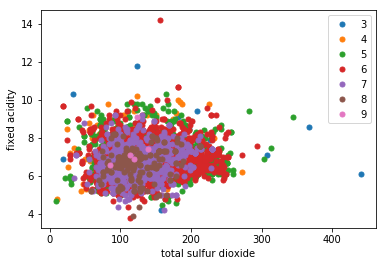

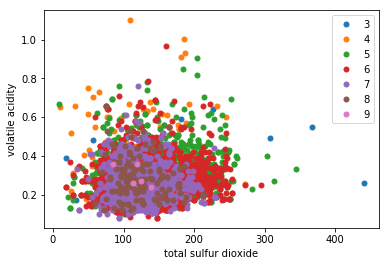

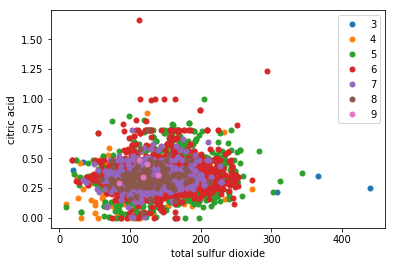

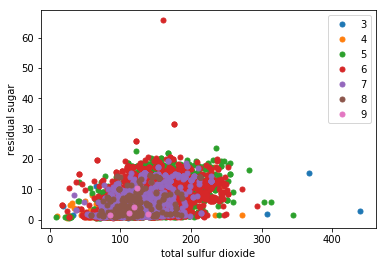

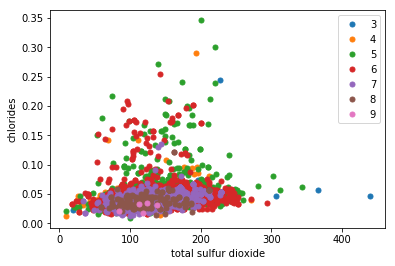

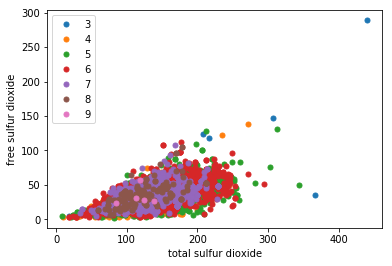

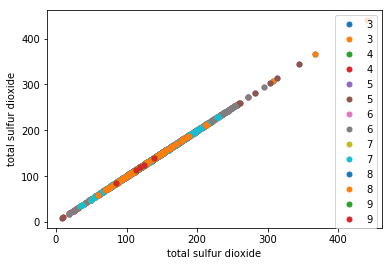

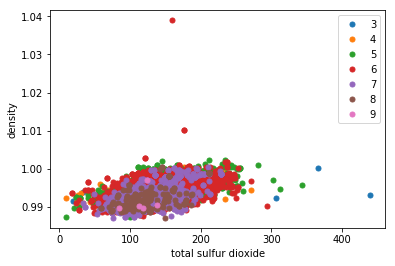

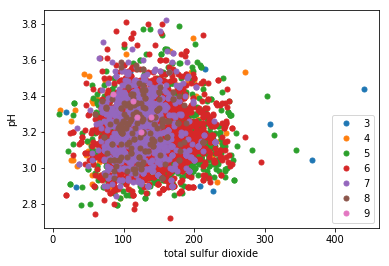

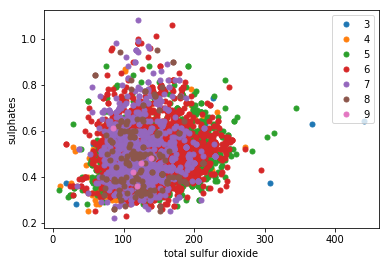

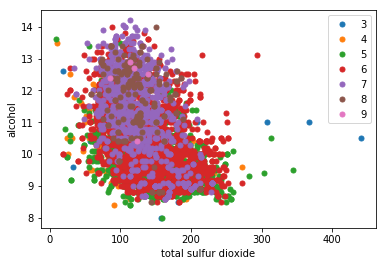

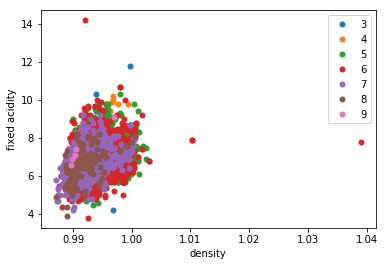

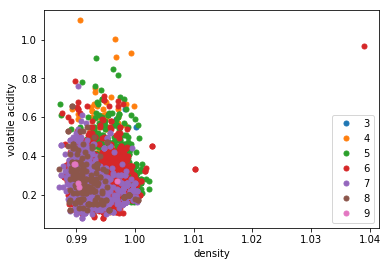

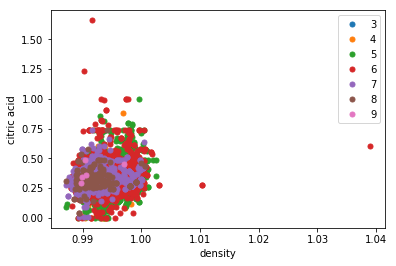

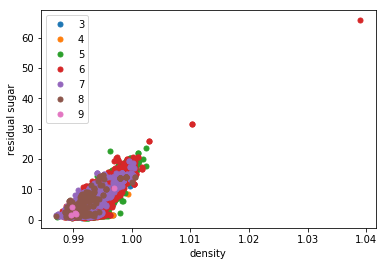

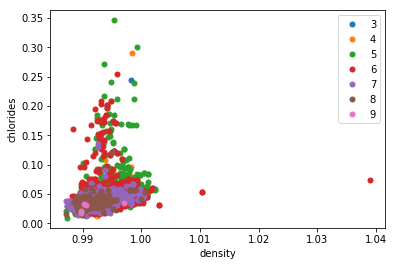

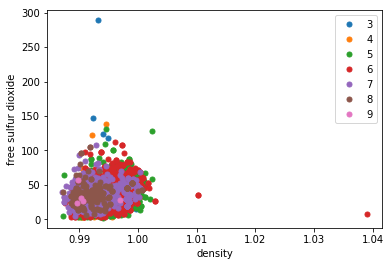

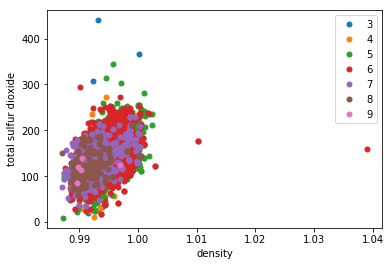

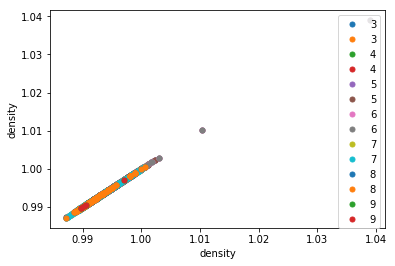

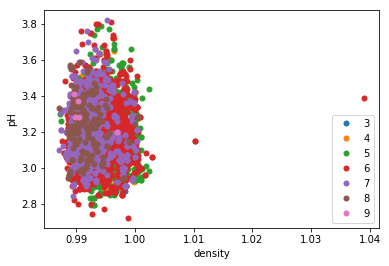

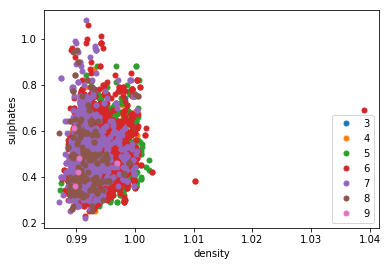

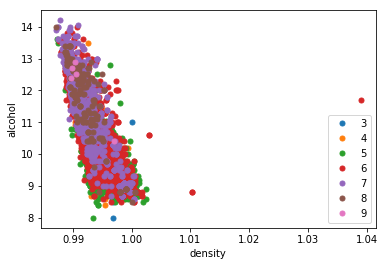

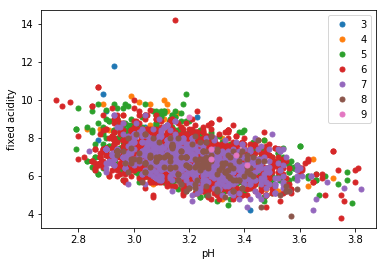

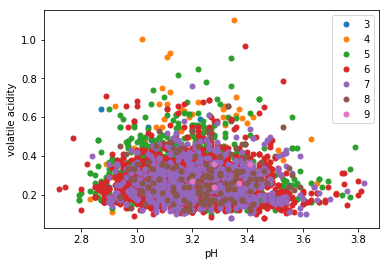

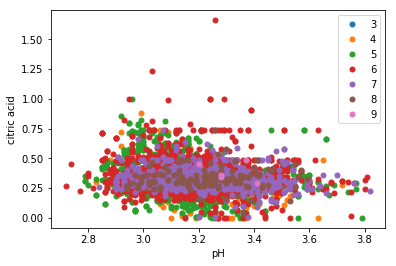

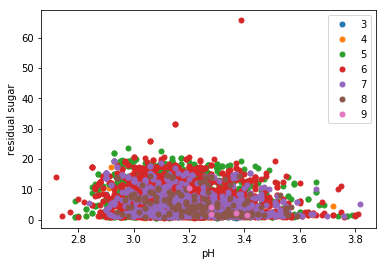

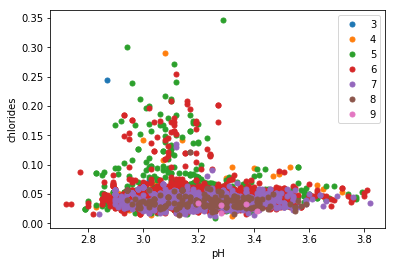

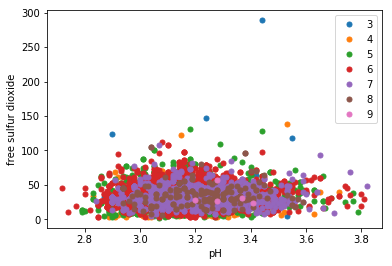

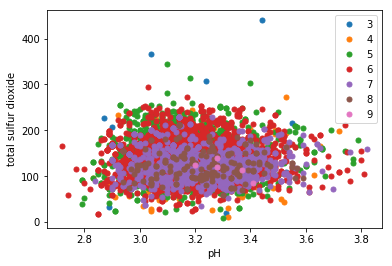

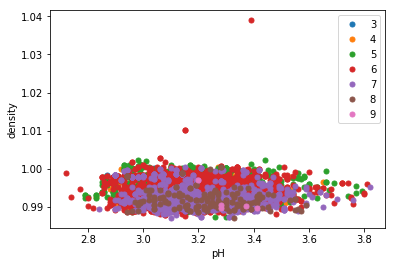

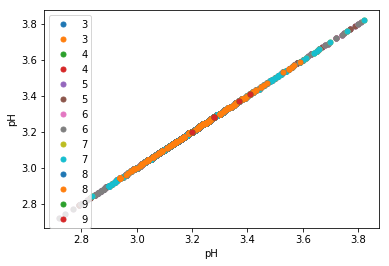

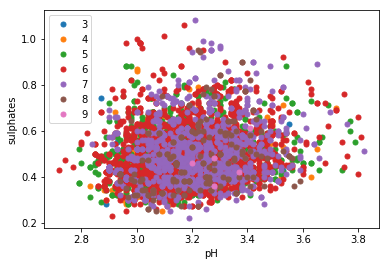

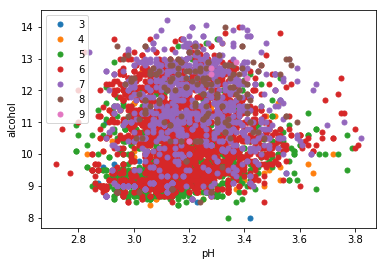

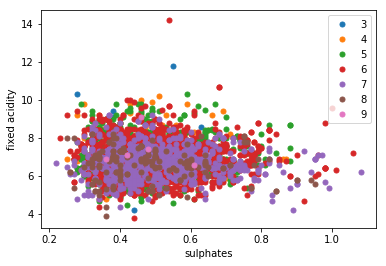

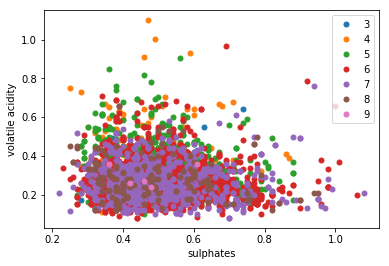

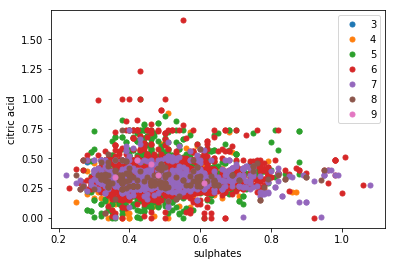

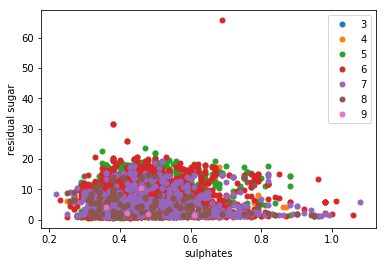

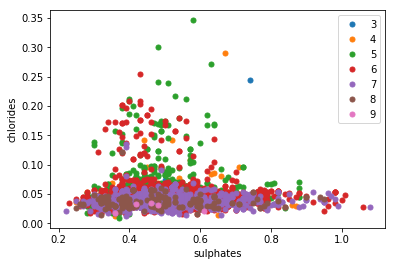

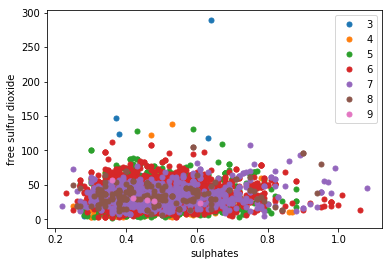

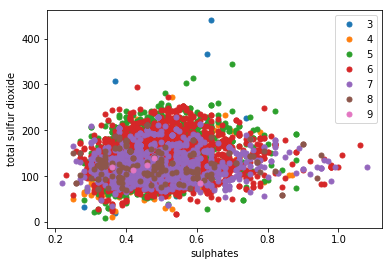

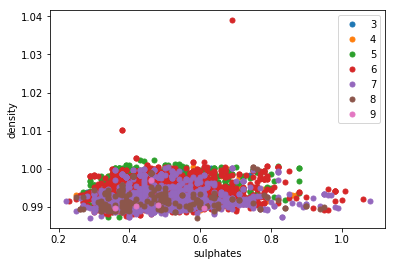

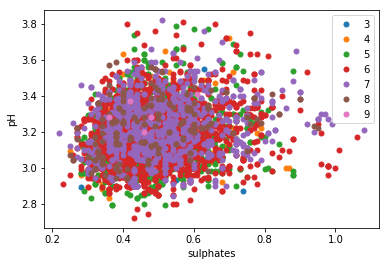

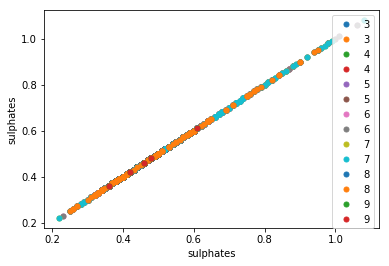

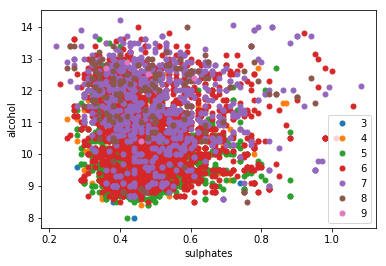

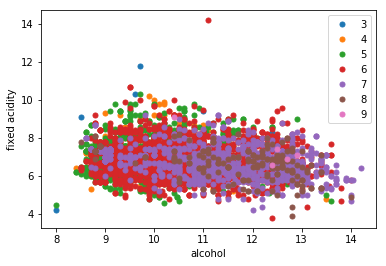

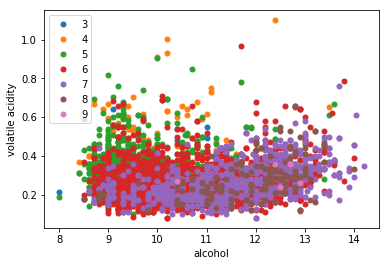

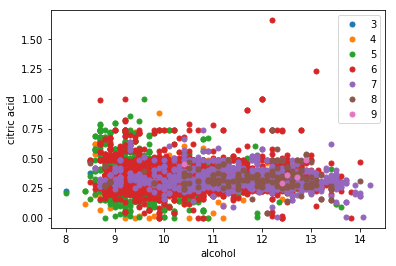

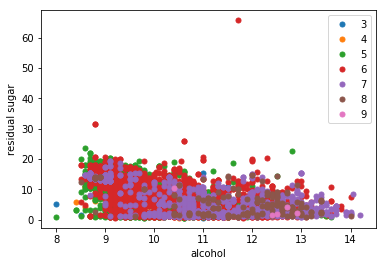

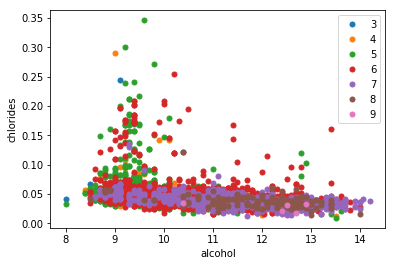

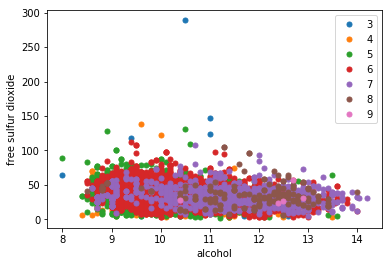

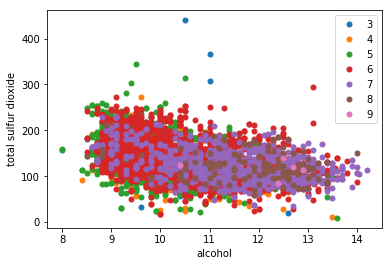

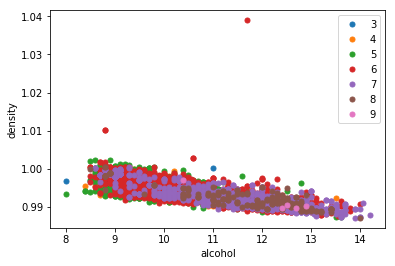

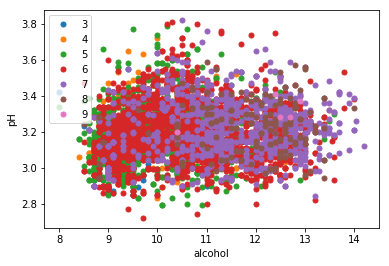

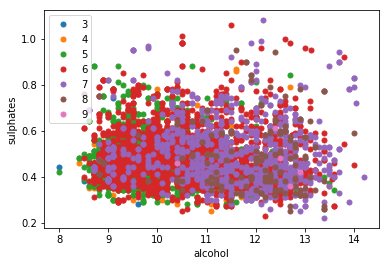

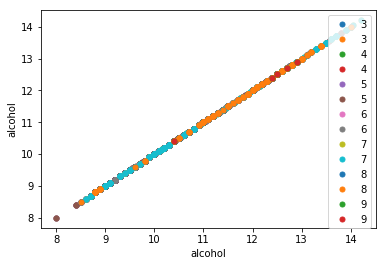

In [14]:
for column1 in data:
    for column2 in data:
        if column1 != "quality" and column2 != "quality":
            scatter_plot_by_group(data[[column1, column2, "quality"]], "quality")

##### Visualise the value distribution of features

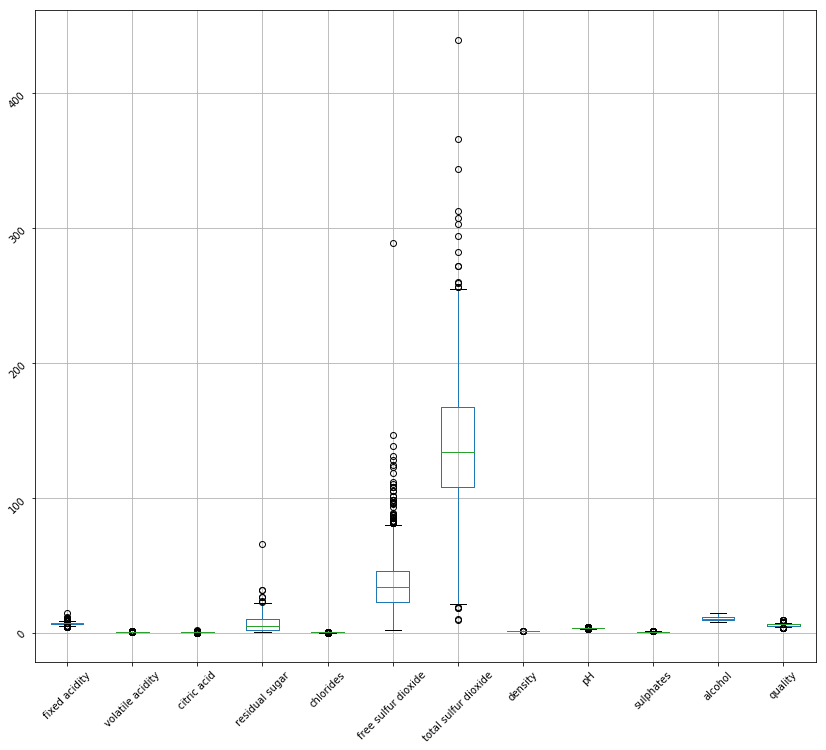

In [15]:
plt.figure(figsize=(14,12))
data.boxplot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Data Preprocessing

In [16]:
#### Feature Scaling

In [8]:
y = data["quality"]
X = data.iloc[:,:-1]

In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.values)
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Feature Selection

##### We are trying to 
    - Fit the model to the data
    - Get Score
    - Get the confidence interval of the score

##### Maybe 
    - Try to evaluate overfitting/underfitting by calculate mean_square_error on validation set(not sure if we can do this easy through corss_val_score or Grid_serach

#### Declare Essential Variable

In [10]:
test_score = {}
train_score = {}
std_test = {}
std_train = {}

## Modelling

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


#### We use grid_search_cv to fit the algorithm to the dataset
    - Use grid search to tune the hyper-parameter of the algorithm, e.g it will use the parameter of the best score to fit the dataset
    - grid_search_cv will compute the score through 10-fold cross validation.


In [12]:
def grid_search_model_fit(estimator, parameters, X, y):
    clf = GridSearchCV(estimator=estimator, param_grid=parameters, cv=10, n_jobs=-1)
    clf.fit(X, y)
    
    # return the classifier
    return clf

## Score Evaluation with confidence interval

In [64]:
def score_evaluation(score, std):
    
    # print the score and confidence interval of each algorithm
    for alg in score:
        
        # plot the normal distribution of the accuracy
        plot_normal_distribution(score[alg], std[alg])
        
        # plot the tplot of the score
        tplot(score, std)
        
        print("Algorithm: {}\n".format(alg))
        print("Accuracy: %0.2f (+/- %0.2f)" % (score[alg], std[alg] * 2))
    
    # boxplot the score and confidence interval of each agortihm
    
    
    
    

## Feature Elimination

In [23]:
from sklearn.feature_selection import  RFECV

estimator = SVC(kernel='linear', C=1)
selector =  RFECV(estimator, step = 1, cv=5, n_jobs=-1)
selector.fit(X, y)
selector.support_



array([ True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True], dtype=bool)

In [25]:
svm_ranked_features = sorted(list(zip(selector.ranking_,data.columns.values[:-1])))
svm_ranked_features

[(1, 'alcohol'),
 (1, 'chlorides'),
 (1, 'density'),
 (1, 'fixed acidity'),
 (1, 'free sulfur dioxide'),
 (1, 'pH'),
 (1, 'residual sugar'),
 (1, 'volatile acidity'),
 (2, 'sulphates'),
 (3, 'citric acid'),
 (4, 'total sulfur dioxide')]

In [30]:
top_features = [ svm_ranked_features[i][1] for i in range(len(svm_ranked_features))]

## Overfittin/Underfitting Evaluation

## Model Evaluation

In [14]:
def model_evaluation(clf):
    
    # select the best score
    scores = clf.grid_scores_
    
    return clf


#### K-Neares_Neighbour

- Fitting K-Nearest Neighbour to the data
- Use Grid Search to optimise the tuning of parameter, in here the parameter needs to be tuned is n_neightbour.
    - Instead of using randomised grid search, I bruteforce n_neighbour from 3 to 10
- Grid Search also implements a 10-fold cross validation, we do that by setting param cv=10



In [28]:
parameters = {'n_neighbors': range(3,11)}
knn = KNeighborsClassifier()
knn_clf = grid_search_model_fit(knn, parameters, X, y)

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [29]:
knn_clf.best_params_

{'n_neighbors': 10}

In [30]:
knn_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [31]:
knn_clf.cv_results_

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

{'mean_fit_time': array([ 0.00404897,  0.0037657 ,  0.0039104 ,  0.00351894,  0.00360613,
         0.00353205,  0.00345147,  0.00379016]),
 'mean_score_time': array([ 0.02589467,  0.02639534,  0.03023129,  0.02893405,  0.02972138,
         0.02926955,  0.03000395,  0.03114252]),
 'mean_test_score': array([ 0.44997958,  0.46876276,  0.47509187,  0.48285014,  0.48080849,
         0.4877501 ,  0.48734177,  0.49897918]),
 'mean_train_score': array([ 0.79624404,  0.73358844,  0.7143508 ,  0.68842344,  0.67601387,
         0.65909099,  0.64790707,  0.63694939]),
 'param_n_neighbors': masked_array(data = [3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False],
        fill_value = ?),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([8, 7, 6, 4, 5, 2, 3, 1], dtype=int32),
 'split0_test_score': ar

In [32]:
test_score['knn'] = knn_clf.best_score_
test_score['knn']

0.49897917517354023

In [33]:
# Get best score index
knn_index = np.where(knn_clf.cv_results_['mean_test_score'] == test_score['knn'])
train_score['knn'] = knn_clf.cv_results_['mean_train_score'][knn_index][0]
train_score['knn']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.63694939145573826

In [34]:
std_test['knn'] = knn_clf.cv_results_['std_test_score'][knn_index][0]
std_test['knn']

0.054882238924548639

In [35]:
std_train['knn'] = knn_clf.cv_results_['std_train_score'][knn_index][0]
std_train['knn']

/Users/kiyim/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.0039760497841248143

## Do your algorithms here

####  Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
RFC = RandomForestClassifier( random_state=0) 
parameters = {'max_depth':np.arange(1, 250, 2)}

RFC_clf = grid_search_model_fit(RFC, parameters, X, y)
 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [55]:
RFC_clf.best_params_

{'max_depth': 7}

In [56]:
RFC_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [57]:
RFC_clf.cv_results_

{'mean_fit_time': array([ 0.02235193,  0.04140973,  0.05183773,  0.06346848,  0.07539985,
         0.08642983,  0.09515271,  0.10056734,  0.10317433,  0.10728493,
         0.10578101,  0.11129568,  0.1262357 ,  0.12062097,  0.12623641,
         0.12623637,  0.11761355,  0.13405735,  0.12182448,  0.12904329,
         0.1205199 ,  0.12944372,  0.11961827,  0.1280406 ,  0.12753904,
         0.11801367,  0.12312703,  0.11931727,  0.13064728,  0.11380243,
         0.11139586,  0.10758588,  0.12382898,  0.12382944,  0.11781297,
         0.10979159,  0.10989201,  0.1159085 ,  0.1185158 ,  0.11350248,
         0.11059461,  0.11600893,  0.1253335 ,  0.12162125,  0.12122214,
         0.12683697,  0.11741171,  0.13405626,  0.12082131,  0.12412992,
         0.11289985,  0.10828757,  0.11400294,  0.10778637,  0.10748553,
         0.11129651,  0.10979247,  0.10738597,  0.10738614,  0.10939145,
         0.10878966,  0.10868871,  0.11119545,  0.1122982 ,  0.11079419,
         0.1132009 ,  0.1117969 , 

In [60]:

test_score['rfc'] = RFC_clf.best_score_
test_score['rfc']

0.53205389955083704

In [62]:
# Get best score index
RFC_index = np.where(RFC_clf.cv_results_['mean_test_score'] == test_score['rfc'])
train_score['rfc'] = RFC_clf.cv_results_['mean_train_score'][RFC_index][0]
train_score['rfc']

0.65400946592480447

In [ ]:
std_train['rfc'] = RFC_clf.cv_results_['std_train_score'][RFC_index][0]
std_train['rfc']

### Small attempt with select from model

In [59]:
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
sfm = SelectFromModel(clf, threshold=0.15)



KeyboardInterrupt: 

In [ ]:
# Train the selector
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

#### SVC with top 8 features


In [26]:
from sklearn.svm import SVC  

In [41]:
svm_c = SVC(kernel='linear')
parameters = {'C':(1,10)}
features= top_features[:8]
svm_clf = grid_search_model_fit(svm_c, parameters, X[features], y)
print("Selected features" + str(features))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Selected features['alcohol', 'chlorides', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'volatile acidity']


In [42]:
svm_clf.best_params_

{'C': 1}

In [43]:
svm_clf.best_score_

0.51510820743160479

## Evaluation

In [66]:
score_evaluation(test_score, std_test)

KeyError: 'rfc'